## Practical #6: Cluster Analysis with Python 

### PART2: Hierarchical Clustering 

In [1]:
import pandas as pd

# Read the data from the csv file
df = pd.read_csv('Prac6-data-vertebrate.csv')
df

,Name,Warm-blooded,Gives Birth,Aquatic Creature,Aerial Creature,Has Legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,reptiles
2,salmon,0,0,1,0,0,0,fishes
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,amphibians
5,komodo,0,0,0,0,1,0,reptiles
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,birds
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,fishes


#### Single Linkage(minimum distance) 



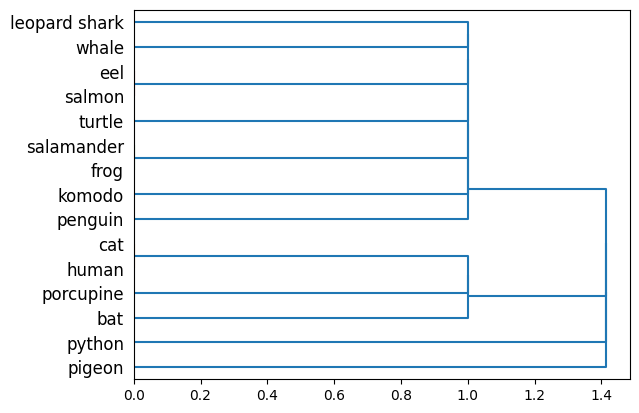

In [2]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
%matplotlib inline

names = df['Name']
X = df.drop(['Name', 'Class'], axis=1)
Y = df['Class']

Z = hierarchy.linkage(X.to_numpy(), 'single')
dn = hierarchy.dendrogram(Z, labels=names.to_numpy(), orientation='right')

#### Complete Linkage(maximum distance)

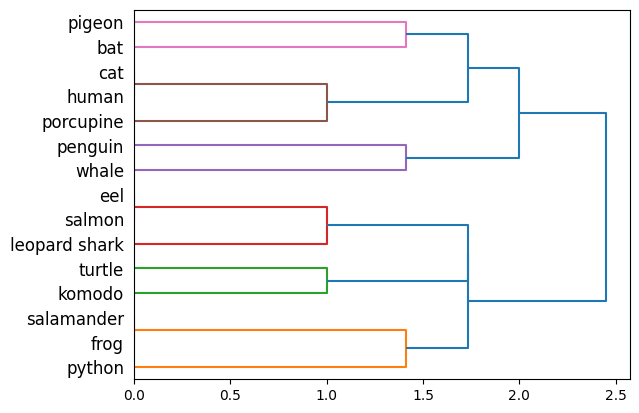

In [3]:
Z = hierarchy.linkage(X.to_numpy(), 'complete') # complete linkage
dn = hierarchy.dendrogram(Z, labels=names.to_numpy(), orientation='right')

### PART3: Density-based Clustering

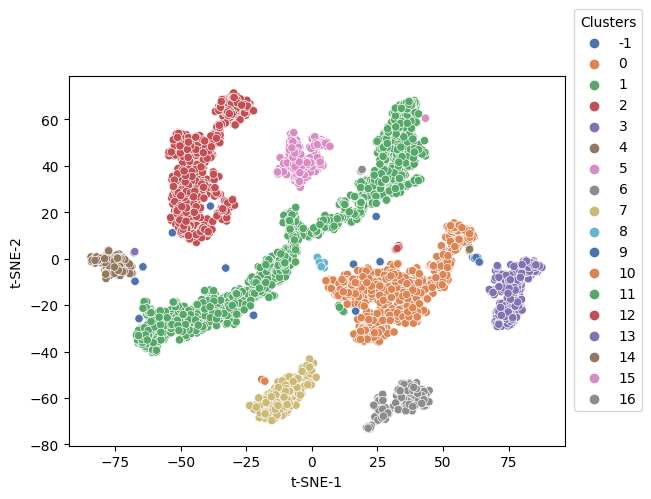

In [4]:
import seaborn as sns
from sklearn.cluster import DBSCAN

df2 = pd.read_csv('https://reneshbedre.github.io/assets/posts/tsne/tsne_scores.csv')

clusters = DBSCAN(eps=3, min_samples=4).fit(df2)

p = sns.scatterplot(data=df2, x='t-SNE-1', y='t-SNE-2', hue=clusters.labels_, legend='full', palette='deep')

sns.move_legend(p, 'upper right', bbox_to_anchor=(1.17, 1.2), title='Clusters')

plt.show()